# PROBLEM STATEMENT

*Reduction of Dataset Dimensions using Principal Component Analysis (PCA)*

1. Import Libraries
2. Load the Dataset and Pre-Processing
3. Perform Dimensionality Reduction using PCA
4. Visualization and Interpretation

The Dataset is a ***California House Price Prediction***.

### Module 1 : Importing Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing        # DATASET

<hr>

### Module 2 : Loading the Dataset, Pre-Processing and Data Preparation

In [2]:
california_housing = fetch_california_housing()

df = pd.DataFrame(data=california_housing.data, columns=california_housing.feature_names)
df['target'] = california_housing.target

df.head(5)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


Seperating X and Y Columns

In [3]:
X = california_housing.data
y = california_housing.target

Scaling and Normalization

In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Checking Correlation among the Features

<Axes: >

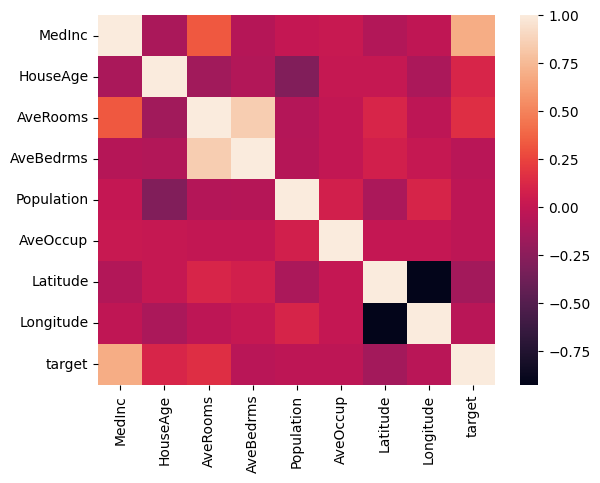

In [5]:
sns.heatmap(df.corr())

<hr>

### Module 3: Perform Dimensionality Reduction using PCA

In [6]:
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

X_pca

array([[ 1.88270434, -0.50336186, -0.31413445],
       [ 1.37111955, -0.12140565,  1.90525769],
       [ 2.08686762, -0.5011357 , -0.93724479],
       ...,
       [ 1.40235696, -1.09642559,  0.56713524],
       [ 1.5429429 , -1.05940835,  0.36547242],
       [ 1.40551621, -0.89672727,  0.89681183]])

In [7]:
components = pca.components_

components

array([[ 0.07746229,  0.00731846,  0.43914246,  0.3999956 , -0.17178267,
        -0.01464423,  0.56836442, -0.53697448],
       [ 0.22987873, -0.26078574,  0.54668689,  0.50184958,  0.10062559,
         0.00262099, -0.37401073,  0.4223868 ],
       [ 0.21822239, -0.6275508 , -0.06399944, -0.19184813,  0.65037482,
         0.15772711,  0.19259966, -0.18082441]])

<hr>

### Module 4: Visualizing the reduced components

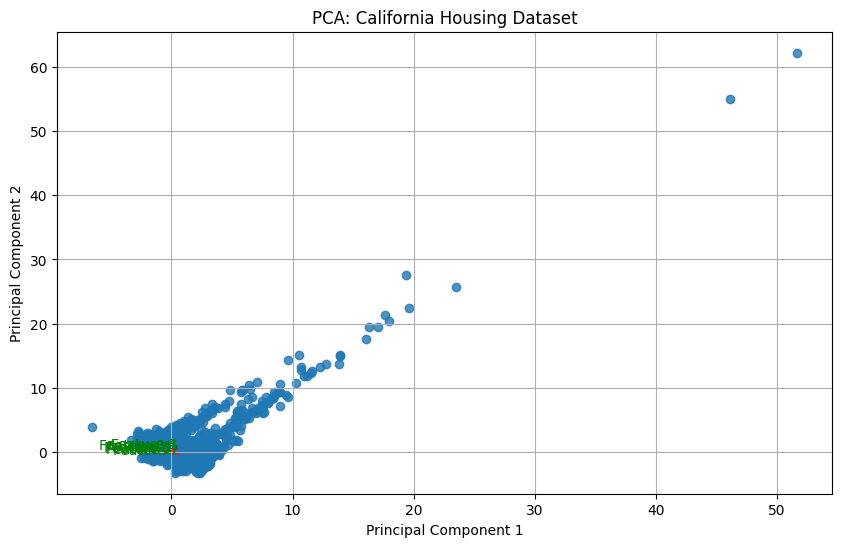

In [10]:
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.8)

for i, (pc1, pc2) in enumerate(zip(components[0], components[1])):
    plt.arrow(0, 0, pc1, pc2, color='r', alpha=0.5, width=0.01, head_width=0.1)
    plt.text(pc1, pc2, 'Feature {}'.format(i+1), color='g', fontsize=10, ha='right')

plt.title('PCA: California Housing Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

<hr><hr>